In [2]:
from tweepy import *
import tweepy
import pandas as pd
import csv
import re 
import string
import preprocessor as p

In [2]:
from tweepy import Cursor

In [42]:
consumer_key = "************************"
consumer_secret ="***********************************"
access_key= "**********************************************"
access_secret = "**********************************"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
count=1000

In [6]:
text_query = 'Bengaluru'
since_date = '2021-01-01'
until_date = '2021-03-07'
count = 20000



tweets = tweepy.Cursor(api.search,q=text_query,lang='en',since=until_date).items(7000)
 
 # Pulling information from tweets iterable object
tweets_list = [[tweet.created_at,tweet.text,tweet.user.screen_name,tweet.user.location,tweet.lang] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list)

In [7]:
tweets_df

,0,1,2,3,4
0,2021-03-07 13:41:17,RT @BangaloreMirror: K Sudhakar said that ther...,Bangalored_,,en
1,2021-03-07 13:41:09,RT @prajwalmanipal: How the Bengaluru metro co...,alanmsdvijay,,en
2,2021-03-07 13:41:08,RT @NammurOfficial: The roots of this area dat...,PriyankKharge,,en
3,2021-03-07 13:41:06,RT @RishiPrasadOrg: A door to door Rishi Prasa...,NavalsinghKane2,,en
4,2021-03-07 13:41:05,RT @RishiPrasadOrg: A door to door Rishi Prasa...,PoojaYa10361065,"Maharashtra, India",en
...,...,...,...,...,...
3827,2021-03-07 00:26:34,Information of domestic flights operated on 06...,aaivspairport,Visakhapatnam,en
3828,2021-03-07 00:17:41,@RGIAHyd I am travelling to Bengaluru from gat...,RoadtripinIndia,India,en
3829,2021-03-07 00:05:18,"From Dubai to Bengaluru, Anoushka's story is a...",WomensFootieIND,India,en
3830,2021-03-07 00:00:38,@BMTC_BENGALURU : are you people still using m...,Sandeep58351523,"Bengaluru, India",en


In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       3832 non-null   datetime64[ns]
 1   1       3832 non-null   object        
 2   2       3832 non-null   object        
 3   3       3832 non-null   object        
 4   4       3832 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 149.8+ KB


In [13]:
tweets_df.to_csv("uncleaned tweets data.csv")

In [10]:
df1=tweets_df

In [11]:
df1.head()

,0,1,2,3,4
0,2021-03-07 13:41:17,RT @BangaloreMirror: K Sudhakar said that ther...,Bangalored_,,en
1,2021-03-07 13:41:09,RT @prajwalmanipal: How the Bengaluru metro co...,alanmsdvijay,,en
2,2021-03-07 13:41:08,RT @NammurOfficial: The roots of this area dat...,PriyankKharge,,en
3,2021-03-07 13:41:06,RT @RishiPrasadOrg: A door to door Rishi Prasa...,NavalsinghKane2,,en
4,2021-03-07 13:41:05,RT @RishiPrasadOrg: A door to door Rishi Prasa...,PoojaYa10361065,"Maharashtra, India",en


### data cleaning

In [4]:
from nltk.stem import WordNetLemmatizer 
import re
import string

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
text=df["1"]

In [7]:
text1=text.to_string()

In [8]:
text2=re.sub("[^-9A-Za-z ]", "" ,text1)

In [9]:
text3=re.sub("[RT]", "" ,text2)

In [15]:
text3

'        BangaloreMirror K Sudhakar said that ther        prajwalmanipal How the Bengaluru metro co        NammurOfficial he roots of this area dat        ishiPrasadOrg A door to door ishi Prasa        ishiPrasadOrg A door to door ishi Prasa        ishiPrasadOrg A door to door ishi Prasa        KhushnumaKashm Javid Parsa runs Parsas       DharmaX amyaBhat rvaidya ranganaat        OIBengaluru H D Kumaraswamy hits out at 9        KhushnumaKashm Javid Parsa runs Parsas       Sportskeeda  he  league matches will        KhushnumaKashm Javid Parsa runs Parsas       KhushnumaKashm Javid Parsa runs Parsas       heJaggi Watch Bengalurus dynamic MP e      ajeshkharvi9 mufaddalvohra Also Kl rahul        ishiPrasadOrg A door to door ishi Prasa      Woman abused slipper thrown at her for feedin       ishiPrasadOrg A door to door ishi Prasa      Woman abused slipper thrown at her for feedin9       KhushnumaKashm Javid Parsa runs Parsas       pavanaja Bengaluru echie Writes Open Let       KhushnumaKa

In [3]:
df=pd.read_csv("uncleaned tweets data.csv")

In [6]:
text

,Unnamed: 0,0,1,2,3,4
0,0,2021-03-07 13:41:17,RT @BangaloreMirror: K Sudhakar said that ther...,Bangalored_,NaN,en
1,1,2021-03-07 13:41:09,RT @prajwalmanipal: How the Bengaluru metro co...,alanmsdvijay,NaN,en
2,2,2021-03-07 13:41:08,RT @NammurOfficial: The roots of this area dat...,PriyankKharge,NaN,en
3,3,2021-03-07 13:41:06,RT @RishiPrasadOrg: A door to door Rishi Prasa...,NavalsinghKane2,NaN,en
4,4,2021-03-07 13:41:05,RT @RishiPrasadOrg: A door to door Rishi Prasa...,PoojaYa10361065,"Maharashtra, India",en
...,...,...,...,...,...,...
3827,3827,2021-03-07 00:26:34,Information of domestic flights operated on 06...,aaivspairport,Visakhapatnam,en
3828,3828,2021-03-07 00:17:41,@RGIAHyd I am travelling to Bengaluru from gat...,RoadtripinIndia,India,en
3829,3829,2021-03-07 00:05:18,"From Dubai to Bengaluru, Anoushka's story is a...",WomensFootieIND,India,en
3830,3830,2021-03-07 00:00:38,@BMTC_BENGALURU : are you people still using m...,Sandeep58351523,"Bengaluru, India",en


In [10]:
text_tokens =word_tokenize(text3)

In [11]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [12]:
print(tokens_without_sw)

['BangaloreMirror', 'K', 'Sudhakar', 'said', 'ther', 'prajwalmanipal', 'How', 'Bengaluru', 'metro', 'co', 'NammurOfficial', 'roots', 'area', 'ishiPrasadOrg', 'A', 'ishi', 'Prasa', 'ishiPrasadOrg', 'A', 'ishi', 'Prasa', 'ishiPrasadOrg', 'A', 'ishi', 'Prasa', 'KhushnumaKashm', 'Javid', 'Parsa', 'runs', 'Parsas', 'DharmaX', 'amyaBhat', 'rvaidya', 'ranganaat', 'OIBengaluru', 'H', 'D', 'Kumaraswamy', 'hits', '9', 'KhushnumaKashm', 'Javid', 'Parsa', 'runs', 'Parsas', 'Sportskeeda', 'league', 'matches', 'KhushnumaKashm', 'Javid', 'Parsa', 'runs', 'Parsas', 'KhushnumaKashm', 'Javid', 'Parsa', 'runs', 'Parsas', 'heJaggi', 'Watch', 'Bengalurus', 'dynamic', 'MP', 'ajeshkharvi9', 'mufaddalvohra', 'Also', 'Kl', 'rahul', 'ishiPrasadOrg', 'A', 'ishi', 'Prasa', 'Woman', 'abused', 'slipper', 'thrown', 'feedin', 'ishiPrasadOrg', 'A', 'ishi', 'Prasa', 'Woman', 'abused', 'slipper', 'thrown', 'feedin9', 'KhushnumaKashm', 'Javid', 'Parsa', 'runs', 'Parsas', 'pavanaja', 'Bengaluru', 'echie', 'Writes', 'Open'

In [13]:
len(tokens_without_sw)

18076

In [14]:
len(text3)

169785

In [15]:
all_stopwords = stopwords.words('english')
all_stopwords.append('Bengaluru')
all_stopwords.append('Bengalurus')


In [16]:
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]


In [30]:
tokens_without_sw


['BangaloreMirror',
 'K',
 'Sudhakar',
 'said',
 'ther',
 'prajwalmanipal',
 'How',
 'metro',
 'co',
 'NammurOfficial',
 'roots',
 'area',
 'dat',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'runs',
 'Parsas',
 'DharmaX',
 'amyaBhat',
 'rvaidya',
 'ranganaat',
 'OIBengaluru',
 'H',
 'D',
 'Kumaraswamy',
 'hits',
 '9',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'runs',
 'Parsas',
 'Sportskeeda',
 'league',
 'matches',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'runs',
 'Parsas',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'runs',
 'Parsas',
 'heJaggi',
 'Watch',
 'dynamic',
 'MP',
 'e',
 'ajeshkharvi9',
 'mufaddalvohra',
 'Also',
 'Kl',
 'rahul',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'Woman',
 'abused',
 'slipper',
 'thrown',
 'feedin',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',


In [26]:
type(tokens_without_sw)

list

In [18]:
lemmatizer = WordNetLemmatizer()

In [40]:
lemmatized_output2 =" ".join([lemmatizer.lemmatize(w) for w in tokens_without_sw])

In [41]:
lemmatized_output =[lemmatizer.lemmatize(w) for w in tokens_without_sw]

In [32]:
lemmatized_output

['BangaloreMirror',
 'K',
 'Sudhakar',
 'said',
 'ther',
 'prajwalmanipal',
 'How',
 'metro',
 'co',
 'NammurOfficial',
 'root',
 'area',
 'dat',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'run',
 'Parsas',
 'DharmaX',
 'amyaBhat',
 'rvaidya',
 'ranganaat',
 'OIBengaluru',
 'H',
 'D',
 'Kumaraswamy',
 'hit',
 '9',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'run',
 'Parsas',
 'Sportskeeda',
 'league',
 'match',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'run',
 'Parsas',
 'KhushnumaKashm',
 'Javid',
 'Parsa',
 'run',
 'Parsas',
 'heJaggi',
 'Watch',
 'dynamic',
 'MP',
 'e',
 'ajeshkharvi9',
 'mufaddalvohra',
 'Also',
 'Kl',
 'rahul',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'Woman',
 'abused',
 'slipper',
 'thrown',
 'feedin',
 'ishiPrasadOrg',
 'A',
 'door',
 'door',
 'ishi',
 'Prasa',
 'Woman'

In [33]:
len(lemmatized_output)

18034

In [22]:
type(lemmatized_output)

str

### saving file

In [39]:
df = pd.DataFrame(lemmatized_output)
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='welcome', index=False)
writer.save()

### word cloud

In [24]:
import io
from collections import Counter
from os import path

import matplotlib.pyplot as plt
from wordcloud import WordCloud

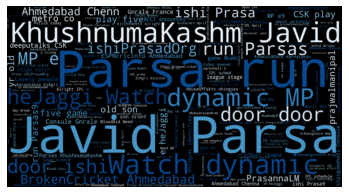

In [29]:
wordcloud = WordCloud(width=1900, height=1024, margin=0,
                      colormap='Blues').generate(lemmatized_output2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()